### Salvando em CSV

#2.1.2 🔵 Identificar e tratar valores nulos


 - Para a tabela USER_INFO que possui a variável "last_month_salary".
 - Esta variável possui vários campos com NULL, mas em um primeiro momento não fiz nada.
 - Provavelmente, só quando for no item de tratar OUTLIERS.
 - Aqui a tabela USER_INFO foi atribuída o nome de DADOS.

In [ ]:
# iMPORTAÇÕES:
from google.colab import drive
import pandas as pd

In [ ]:
# Montando o Drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Lendo os dados
dados = pd.read_csv('/content/drive/MyDrive/Laboratória - < L >/PROJETO 3/Planilhas/user_info.csv')

In [ ]:
dados.columns

Index(['user_id', 'age', 'sex', 'last_month_salary', 'number_dependents'], dtype='object')

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            36000 non-null  int64  
 1   age                36000 non-null  int64  
 2   sex                36000 non-null  object 
 3   last_month_salary  28801 non-null  float64
 4   number_dependents  35057 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.4+ MB


In [ ]:
#Informações de colunas que contém dados numéricos(média, min, máx)

dados.describe()

,user_id,age,last_month_salary,number_dependents
count,36000.000000,36000.000000,2.880100e+04,35057.000000
mean,18000.500000,52.417417,6.675052e+03,0.758080
std,10392.449182,14.791331,1.296178e+04,1.118739
min,1.000000,21.000000,0.000000e+00,0.000000
25%,9000.750000,41.000000,3.400000e+03,0.000000
50%,18000.500000,52.000000,5.400000e+03,0.000000
75%,27000.250000,63.000000,8.300000e+03,1.000000
max,36000.000000,109.000000,1.560100e+06,13.000000


Importanto Numpy

In [ ]:
import numpy as np

##MÉDIA:

In [ ]:
# MÉDIA - forma direta

media = np.mean(dados['last_month_salary'])
print('Media artmetica:', media)

Media artmetica: 6675.05204680393


##MEDIANA:


In [ ]:
mediana = dados['last_month_salary'].median()
print('Mediana:', mediana)


Mediana: 5400.0


## ISNULL

In [ ]:
# ISNULL - qtd de valores NULOS na coluna "last_month_salary"

dados['last_month_salary'].isnull().value_counts()

,count
last_month_salary,
False,28801
True,7199


In [ ]:
# Preferi a MEDIANA

mediana = dados['last_month_salary'].median()
mediana

5400.0

## LOC

In [ ]:
# Aqui atribuí, ou substituí os valores NUll
# loc: é usado para buscar/modificar dados em DataFrames usando rótulos.

dados.loc[dados['last_month_salary'].isnull(), 'last_month_salary'] = mediana


In [ ]:
# Aqui verifico se as células com NUll ainda existem.
# NÃO!

dados[dados['last_month_salary'].isnull()]['last_month_salary'].value_counts()

,count
last_month_salary,


## Função/Método	O que faz?

* isnull(): Detecta valores nulos (True/False)
* isnull().sum(): Conta nulos por coluna
* fillna(): Substitui nulos por um valor
* dropna(): Remove linhas/colunas com nulos

#2.1.4🔵 Identificar e gerenciar dados fora do escopo da análise

##DESVIO PADRÃO:


* Para as variáveis de correlação MUITO FORTE;
* Foi aplicado para a tabela "loans_detail";
* Aqui a tabela LOANS_DETAIL fopi atribuída o nome de TABELA_LOANS_DETAILS.

In [ ]:
# Lendo os dados
tabela_loans_detail = pd.read_csv('/content/drive/MyDrive/Laboratória - < L >/PROJETO 3/Planilhas/loans_detail.csv')

In [ ]:
tabela_loans_detail.columns

Index(['user_id', 'more_90_days_overdue',
       'using_lines_not_secured_personal_assets',
       'number_times_delayed_payment_loan_30_59_days', 'debt_ratio',
       'number_times_delayed_payment_loan_60_89_days'],
      dtype='object')

In [ ]:
# VARIÁVEL (number_times_delayed_payment_loan_30_59_days)

tabela_loans_detail['number_times_delayed_payment_loan_30_59_days'].std()

4.144020438226026

In [ ]:
# VARIÁVEL (more_90_days_overdue)

tabela_loans_detail['more_90_days_overdue'].std()

4.121364668428526

In [ ]:
# VARIÁVEL (number_times_delayed_payment_loan_60_89_days)

tabela_loans_detail['number_times_delayed_payment_loan_60_89_days'].std()

4.1055147551019315

#2.1.6 🔵 Identificar e tratar dados discrepantes em variáveis ​​numéricas

## @VARIÁVEL: last month salary

* TABELA: user_infor (aqui DADOS)
* VARIÁVEL: last month salary

### 1º ANÁLISE:
 * MÉDIA DE DESVIO PADRÃO

In [ ]:
# MÉDIA - forma direta

media = np.mean(dados['last_month_salary'])
print('Media artmetica:', media)

Media artmetica: 6420.0770555555555


In [ ]:
# DESVIO PADRÃO

desvio = np.std(dados['last_month_salary'])
print('Desvio padrão:', desvio)

Desvio padrão: 11604.579060602628


In [ ]:
#LIMITE SUPERIOR:
#(Tudo que é ACIMA de 45.559 é outlier - ANTES DE TRATAR OS NULL)

#Tudo que é ACIMA de 41233 é outlier <<<

media + 3*desvio

np.float64(41233.81423736344)

In [ ]:
#LIMITE INFERIOR:
#(Tudo que é ABAIXO de -32.209 é outlier - DEIXEI AQUI PQ ESSE ERA O VALOR ANTES DE TRATAR OS Null)

#Tudo que é ABAIXO de -28393 é outlier <<<

media - 3*desvio

np.float64(-28393.660126252325)

### 2ª ANÁLISE:

* Formas mais conservadoras, ou seguras, pois será se os limites definidos no calculo acima FAZEM SENTIDO?




### a. Para visualizar os quartis: BOXPLOT

In [ ]:
# Para isso, PRIMEIRO, Vamos agora construir o BOXPLOT
# Primeiro, importar a biblioteca do matplotlib

import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x7e8a42f0e390>,
 'caps': [<matplotlib.lines.Line2D at 0x7e8a42f0fb10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e8a43783890>],
 'medians': [<matplotlib.lines.Line2D at 0x7e8a42f1d650>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e8a42f1e250>],
 'means': []}

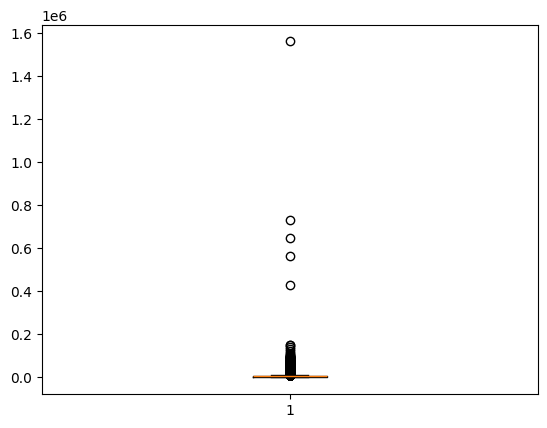

In [ ]:
# Para visualizar os QUARTIS:

plt.boxplot(dados['last_month_salary'])

 O que ele está mostrando?
* A maioria dos salários está concentrada perto de zero, com pouca variação.

* Há vários pontos fora do “bigode” (whiskers) do boxplot — esses são os outliers.

* Tem pelo menos um salário acima de 1.500.000, o que está completamente fora da faixa da maioria dos dados.

 Interpretação:
* Isso indica que existem valores que provavelmente não são realistas ou que representam casos raros/extremos.

Pode haver:

* Erros de digitação (por exemplo, digitar 1.500.000 em vez de 15.000)

* Valores que representam diretores, empresários, etc., fora da realidade dos demais clientes

* Algum padrão enviesado no preenchimento dos dado

In [ ]:
# Para visualizar os MAIORES VALORES:

dados['last_month_salary'].sort_values(ascending=False).head(10)


,last_month_salary
21095,1560100.0
6542,730483.0
23383,649587.0
22075,562466.0
24042,428250.0
2291,150000.0
15931,150000.0
34712,143000.0
34557,133000.0
2854,121000.0


### b. Utilizando MEDIANA + QUARTIS


In [ ]:
# 1º QUARTIL:

Q1  = dados['last_month_salary'].quantile(0.25)
Q1

np.float64(3900.0)

In [ ]:
# 3º QUARTIL:

Q3  = dados['last_month_salary'].quantile(0.75)
Q3

np.float64(7416.0)

In [ ]:
# INTERQUARTIL

IQR = Q3-Q1
IQR

np.float64(3516.0)

In [ ]:
# Calculados os QUARTIS, agora vamos definir os LIMITES:

# Limite SUPERIOR:

lim_superior = Q3 + (1.5*IQR)
lim_superior

np.float64(12690.0)

In [ ]:
# Limite INFERIOR - Como estamos lidando c salário, podemos considerar o limite inferior como
# o máximo entre o limite inferior e zero, pq não tem salário negativo.

lim_inferior = Q1 - (1.5*IQR)
lim_inferior

np.float64(-1374.0)

In [ ]:
outliers = dados[(dados['last_month_salary'] > lim_superior) | (dados['last_month_salary'] < lim_inferior)]
outliers

,user_id,age,sex,last_month_salary,number_dependents
7,8,55,M,15658.0,0.0
63,64,48,F,15000.0,0.0
87,88,44,M,51140.0,3.0
104,105,51,M,13455.0,1.0
106,107,37,M,12996.0,4.0
...,...,...,...,...,...
35895,35896,43,F,14574.0,1.0
35905,35906,73,F,12887.0,0.0
35927,35928,48,M,19000.0,2.0
35936,35937,65,M,21600.0,2.0


### Ações Sugeridas:

* Localizar e substituir os ouliers por média ou mediana


In [ ]:
dados[(dados['last_month_salary'] > lim_superior)].value_counts()

,,,,,count
user_id,age,sex,last_month_salary,number_dependents,
35947,60,M,15125.0,1.0,1
8,55,M,15658.0,0.0,1
64,48,F,15000.0,0.0,1
88,44,M,51140.0,3.0,1
105,51,M,13455.0,1.0,1
...,...,...,...,...,...
224,54,F,17433.0,1.0,1
181,73,F,26500.0,0.0,1
179,42,F,18000.0,3.0,1


Bloxpot, após tratamento de user_infor e os outliers

In [ ]:
user_info_outliers = pd.read_csv('/content/drive/MyDrive/Laboratória - < L >/PROJETO 3/Planilhas - Análise/user_info_outliers.csv')
user_info_outliers

,user_id,age,sex,last_month_salary,q1,q3,iqr,limite_inferior,limite_superior,is_outlier
0,17258,21,F,845.0,3875,7333,3458,-1312,12520,False
1,3319,22,F,5400.0,3875,7333,3458,-1312,12520,False
2,2686,23,F,1527.0,3875,7333,3458,-1312,12520,False
3,22278,23,F,1700.0,3875,7333,3458,-1312,12520,False
4,13216,24,F,0.0,3875,7333,3458,-1312,12520,False
...,...,...,...,...,...,...,...,...,...,...
35995,27903,87,M,2483.0,3875,7333,3458,-1312,12520,False
35996,26331,88,M,4100.0,3875,7333,3458,-1312,12520,False
35997,22334,89,M,3950.0,3875,7333,3458,-1312,12520,False
35998,488,90,M,7000.0,3875,7333,3458,-1312,12520,False


{'whiskers': [<matplotlib.lines.Line2D at 0x7e8a40ce3650>,
 'caps': [<matplotlib.lines.Line2D at 0x7e8a40cf0a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e8a40ce2d50>],
 'medians': [<matplotlib.lines.Line2D at 0x7e8a40cf1e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e8a40cf2710>],
 'means': []}

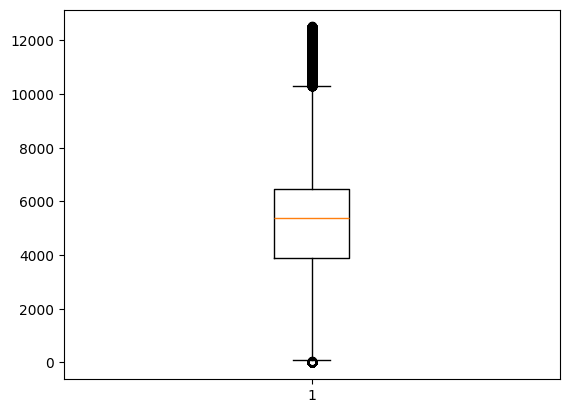

In [ ]:
plt.boxplot(user_info_outliers['last_month_salary'])

### Conclusão:



* Caixa (Box):
 - Representa o intervalo entre o 1º quartil (Q1) e o 3º quartil (Q3), ou seja, os 50% centrais dos salários.
 - A linha dentro da caixa é a mediana (Q2), que divide a amostra ao meio. No seu gráfico, a mediana está em torno de 5.500 a 6.000, o que significa que metade dos salários está abaixo desse valor.

* Extensões (bigodes ou whiskers):

  - Vão do menor valor que não é considerado outlier até o maior valor ainda dentro dos limites normais.O limite superior dos bigodes parece estar em torno de 10.000, e o inferior um pouco acima de 0.

* Pontos fora da caixa (círculos ou marcas acima e abaixo dos bigodes):

  - São os outliers (valores discrepantes), ou seja, salários muito altos ou muito baixos comparados ao resto. Há vários outliers para cima, indicando que algumas pessoas ganham bem acima do normal (acima de 10.000, até cerca de 12.000+).Também há alguns outliers para baixo, mostrando salários muito baixos (próximos de 0).

Para salvar em csv - p guardar pq colocoar no inicio deu erro

dados.to_csv('/content/drive/MyDrive/Laboratória - < L >/PROJETO 3/Projeto 3 - LAB.csv', index=False)

## @VARIÁVEL: more 90 days overdue

* TABELA: loans_detail
* VARIÁVEL: more 90 days overdue

In [ ]:
# PRIMEIRO: Importando a tabela LOANS_DETAIL

loans_detail = pd.read_csv('/content/drive/MyDrive/Laboratória - < L >/PROJETO 3/Planilhas/loans_detail.csv')
loans_detail

,user_id,more_90_days_overdue,using_lines_not_secured_personal_assets,number_times_delayed_payment_loan_30_59_days,debt_ratio,number_times_delayed_payment_loan_60_89_days
0,1,0,0.667083,0,0.153112,0
1,2,0,0.007093,0,0.148800,0
2,3,0,0.091213,0,0.351635,1
3,4,0,0.112680,0,0.065959,0
4,5,0,0.323985,0,0.352151,0
...,...,...,...,...,...,...
35995,35996,1,0.000000,1,0.062858,0
35996,35997,0,0.061117,0,0.013598,0
35997,35998,0,0.817745,0,0.663056,0
35998,35999,0,0.106139,2,0.865438,0


a. Para visualizar os quartis: BOXPLOT

In [ ]:
import numpy as np

{'whiskers': [<matplotlib.lines.Line2D at 0x7e8a40d52ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e8a40d60290>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e8a40d52490>],
 'medians': [<matplotlib.lines.Line2D at 0x7e8a40d61610>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e8a40d42ed0>],
 'means': []}

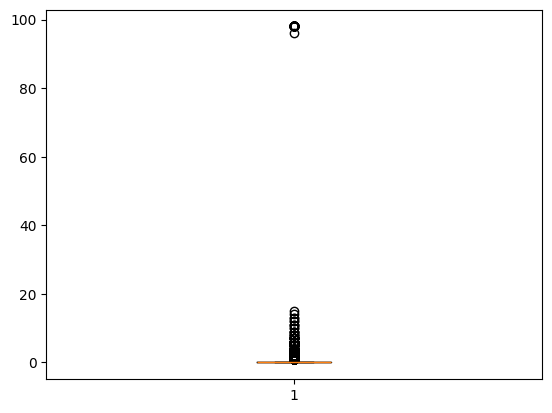

In [ ]:
# Boxplot antes de tratar

plt.boxplot(loans_detail['more_90_days_overdue'])

In [ ]:
# Para visualizar os MAIORES VALORES:

loans_detail['more_90_days_overdue'].sort_values(ascending=False).head(100).value_counts()


,count
more_90_days_overdue,
98,62
7,10
6,8
9,4
8,4
11,3
13,2
10,2
12,2


b. Utilizando MEDIANA + QUARTIS

In [ ]:
# 1º QUARTIL:

Q1  = loans_detail['more_90_days_overdue'].quantile(0.25)
Q1

np.float64(0.0)

In [ ]:
# 3º QUARTIL:

Q3  = loans_detail['more_90_days_overdue'].quantile(0.75)
Q3


np.float64(0.0)

In [ ]:
# INTERQUARTIL

IQR = Q3-Q1
IQR

np.float64(0.0)

In [ ]:
# Calculados os QUARTIS, agora vamos definir os LIMITES:

# Limite SUPERIOR:

lim_superior = Q3 + (1.5*IQR)
lim_superior

np.float64(0.0)

In [ ]:
# Limite INFERIOR - Como estamos lidando c salário, podemos considerar o limite inferior como
# o máximo entre o limite inferior e zero, pq não tem salário negativo.

lim_inferior = Q1 - (1.5*IQR)
lim_inferior

np.float64(0.0)

In [ ]:
  outliers2 = loans_detail[(loans_detail['more_90_days_overdue'] > lim_superior) | (loans_detail['more_90_days_overdue'] < lim_inferior)]
  outliers2

,user_id,more_90_days_overdue,using_lines_not_secured_personal_assets,number_times_delayed_payment_loan_30_59_days,debt_ratio,number_times_delayed_payment_loan_60_89_days
7,8,1,0.062280,0,0.406667,0
13,14,1,0.964024,0,0.059349,0
22,23,5,1.000000,0,1365.000000,0
28,29,1,0.001496,4,0.492458,3
87,88,2,0.873251,0,0.021001,0
...,...,...,...,...,...,...
35947,35948,1,0.436149,1,31.000000,0
35976,35977,2,0.013727,4,0.001880,0
35979,35980,1,1.000000,0,0.030969,0
35995,35996,1,0.000000,1,0.062858,0


## @VARIÁVEL: using lines not secured personal assetse

* TABELA: loans_detail
* VARIÁVEL: using lines not secured personal assets

a. Para visualizar os quartis: BOXPLOT

{'whiskers': [<matplotlib.lines.Line2D at 0x7e8a40dae190>,
 'caps': [<matplotlib.lines.Line2D at 0x7e8a40dc6150>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e8a40dc4250>],
 'medians': [<matplotlib.lines.Line2D at 0x7e8a40dc7a50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e8a40bdc690>],
 'means': []}

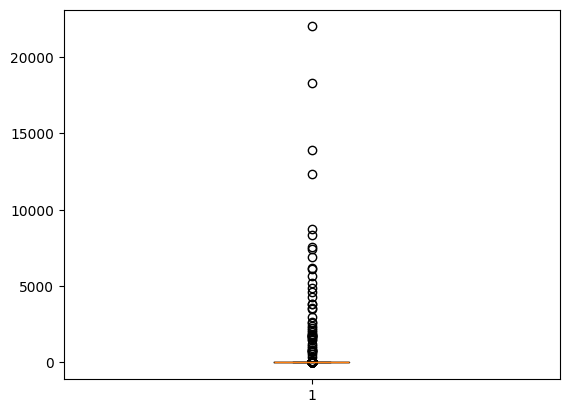

In [ ]:
plt.boxplot(loans_detail['using_lines_not_secured_personal_assets'])

In [ ]:
# Para visualizar os MAIORES VALORES:

# Não entendi pq saiu com esses valores,mas bora fazer quartis

loans_detail['using_lines_not_secured_personal_assets'].sort_values(ascending=False).head(95).value_counts()

,count
using_lines_not_secured_personal_assets,
22000.000000,1
18300.000000,1
13930.000000,1
12369.000000,1
8710.000000,1
...,...
1.947631,1
1.940120,1
1.936255,1


b. Utilizando MEDIANA + QUARTIS

In [ ]:
# 1º QUARTIL:

Q1  = loans_detail['using_lines_not_secured_personal_assets'].quantile(0.25)
Q1

np.float64(0.02952638225)

In [ ]:
# 3º QUARTIL:

Q3  = loans_detail['using_lines_not_secured_personal_assets'].quantile(0.75)
Q3

np.float64(0.54852904775)

In [ ]:
# INTERQUARTIL

IQR = Q3-Q1
IQR

np.float64(0.5190026655)

In [ ]:
# Calculados os QUARTIS, agora vamos definir os LIMITES:

# Limite SUPERIOR:

lim_superior = Q3 + (1.5*IQR)
lim_superior

np.float64(1.327033046)

In [ ]:
# Limite INFERIOR - Como estamos lidando c salário, podemos considerar o limite inferior como

lim_inferior = Q1 - (1.5*IQR)
lim_inferior

np.float64(-0.7489776159999999)

In [ ]:
outliers3 = loans_detail[(loans_detail['using_lines_not_secured_personal_assets'] > lim_superior) | (loans_detail['using_lines_not_secured_personal_assets'] < lim_inferior)]
outliers3

,user_id,more_90_days_overdue,using_lines_not_secured_personal_assets,number_times_delayed_payment_loan_30_59_days,debt_ratio,number_times_delayed_payment_loan_60_89_days
395,396,0,5186.000000,0,0.211158,0
505,506,0,112.000000,0,0.232451,0
785,786,0,4.638723,2,1011.000000,1
1409,1410,0,8710.000000,0,0.442809,0
1808,1809,0,2583.000000,0,0.178470,0
...,...,...,...,...,...,...
34583,34584,0,532.000000,0,0.256974,0
34834,34835,0,8328.000000,0,21395.000000,1
34897,34898,0,18.000000,0,1428.000000,0
34907,34908,0,1819.000000,0,0.365954,0


In [ ]:
# MEDIANA
mediana = loans_detail['using_lines_not_secured_personal_assets'].median()
mediana

0.14965491050000002

In [ ]:
media = loans_detail['using_lines_not_secured_personal_assets'].mean()
media

np.float64(5.807039948604555)

In [ ]:
media2 = np.mean(loans_detail['using_lines_not_secured_personal_assets'])
print('Media artmetica:', media2)

Media artmetica: 5.807039948604555


### Ação:
* Acabei substituindo os outliers pela média dos não_outiliers, assim como fiz com a variável do salário na tabela user_info;
* O média ficou: 0,3134089933 (calculada no Bigquery)

### Boxplot da tabela loans_detail_tratada

In [ ]:
# PRIMEIRO: Importando a tabela LOANS_DETAIL

loans_detail_tratada = pd.read_csv('/content/drive/MyDrive/Laboratória - < L >/PROJETO 3/Planilhas - Análise/using_lines_not_secured_personal_assets_tratada.csv')


{'whiskers': [<matplotlib.lines.Line2D at 0x7e8a40c3ff90>,
 'caps': [<matplotlib.lines.Line2D at 0x7e8a40c49610>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e8a40c3f2d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e8a40c4ae90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e8a40c4b950>],
 'means': []}

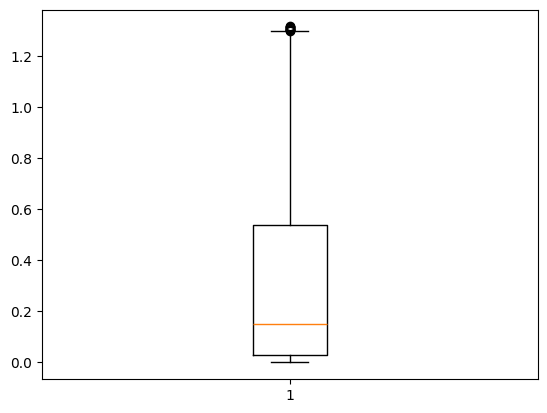

In [ ]:
plt.boxplot(loans_detail_tratada['using_lines_not_secured_personal_assets_tratada'])

## @VARIÁVEL: debt ratio

* TABELA: loans_detail
* VARIÁVEL: debt_ratio

{'whiskers': [<matplotlib.lines.Line2D at 0x7e8a40bf0cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e8a42f24710>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e8a42f49190>],
 'medians': [<matplotlib.lines.Line2D at 0x7e8a431a00d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e8a40c6d510>],
 'means': []}

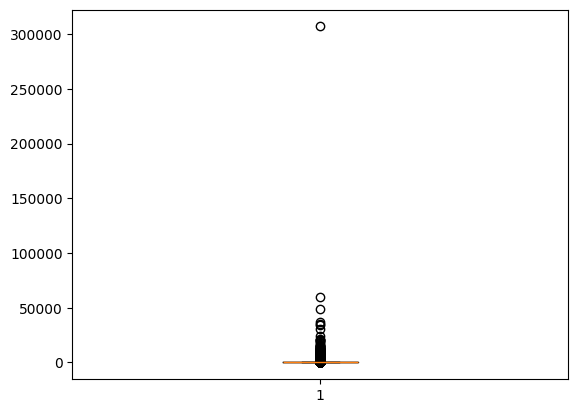

In [ ]:
plt.boxplot(loans_detail['debt_ratio'])

In [ ]:
# Para visualizar os MAIORES VALORES:

loans_detail['debt_ratio'].sort_values(ascending=False).head().value_counts()

,count
debt_ratio,
307001.0,1
60212.0,1
49112.0,1
36705.0,1
34719.0,1


In [ ]:
# 1º QUARTIL:

Q1  = loans_detail['debt_ratio'].quantile(0.25)
Q1

np.float64(0.1762646675)

In [ ]:
# 3º QUARTIL:

Q3  = loans_detail['debt_ratio'].quantile(0.75)
Q3

np.float64(0.87355158)

In [ ]:
# INTERQUARTIL

IQR = Q3-Q1
IQR

np.float64(0.6972869125)

In [ ]:
# Calculados os QUARTIS, agora vamos definir os LIMITES:

# Limite SUPERIOR:

lim_superior = Q3 + (1.5*IQR)
lim_superior

np.float64(1.9194819487499999)

In [ ]:
# Limite INFERIOR - Como estamos lidando c salário, podemos considerar o limite inferior como

lim_inferior = Q1 - (1.5*IQR)
lim_inferior

np.float64(-0.8696657012499999)

In [ ]:
outliers4 = loans_detail[(loans_detail['debt_ratio'] > lim_superior) | (loans_detail['debt_ratio'] < lim_inferior)]
outliers4

,user_id,more_90_days_overdue,using_lines_not_secured_personal_assets,number_times_delayed_payment_loan_30_59_days,debt_ratio,number_times_delayed_payment_loan_60_89_days
9,10,0,0.040263,0,11.41791,0
11,12,0,0.012198,0,859.00000,0
18,19,0,0.069207,0,2610.00000,0
19,20,0,0.679730,0,1546.00000,0
21,22,0,0.115360,0,1477.00000,0
...,...,...,...,...,...,...
35981,35982,0,0.139420,0,927.00000,0
35982,35983,0,0.068098,0,2055.00000,0
35985,35986,0,0.420788,1,1333.00000,0
35987,35988,0,0.009115,0,7.00000,0
